In [3]:
# 출처 : https://todayisbetterthanyesterday.tistory.com/62

### 실습 데이터 Load

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [7]:
data = np.load('./data/clusterable_data.npy')

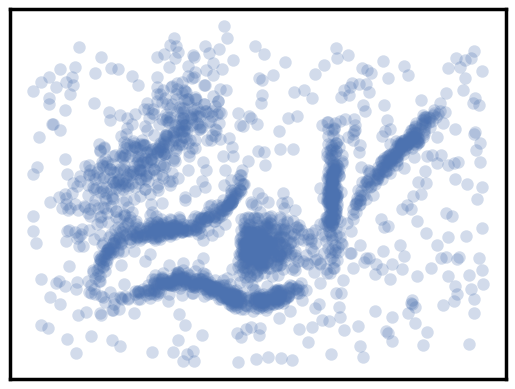

In [3]:
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [4]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

### K-Means fitting

/home/sjjung/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


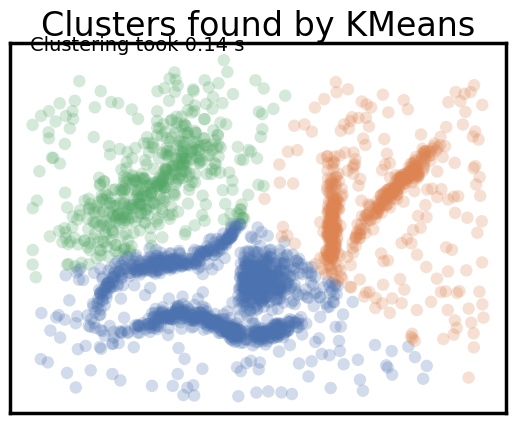

In [5]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':3})

/home/sjjung/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


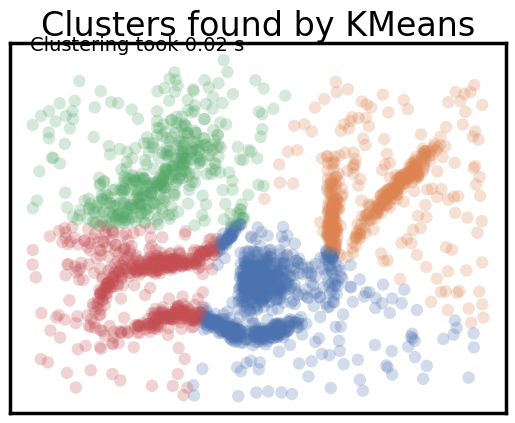

In [17]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':4})

/home/sjjung/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


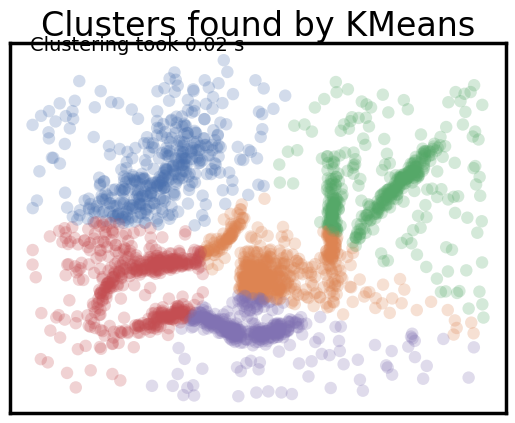

In [18]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':5})

### DBSCAN fitting

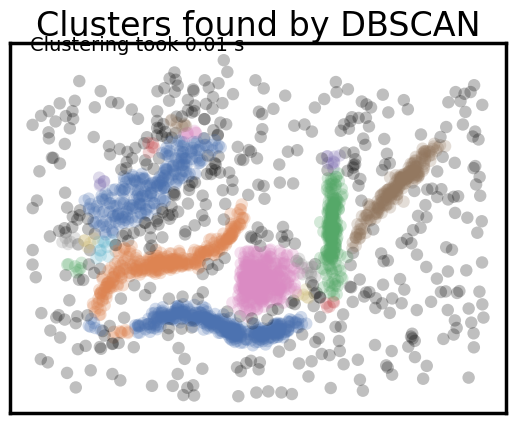

In [20]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.020})

In [21]:
dbs = DBSCAN(eps=0.03)
dbs2=dbs.fit(data)
dbs2.labels_

array([ 0,  0,  0, ..., -1, -1,  0])

### HDBSCAN
##### DBSCAN보다 하이퍼 파라미터(eps, min_samples)에 덜 민감

In [23]:
!pip install hdbscan

     |████████████████████████████████| 5.2 MB 13.2 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp38-cp38-linux_x86_64.whl size=3780098 sha256=3ff0edcc09b5a67ea9925aa5387b8974d7a61dea195a1165c09aa48871cedcd2
  Stored in directory: /home/sjjung/.cache/pip/wheels/72/93/36/3c7c74a6f2127e71810a0e0f535955175556a434aec55de679
Successfully built hdbscan


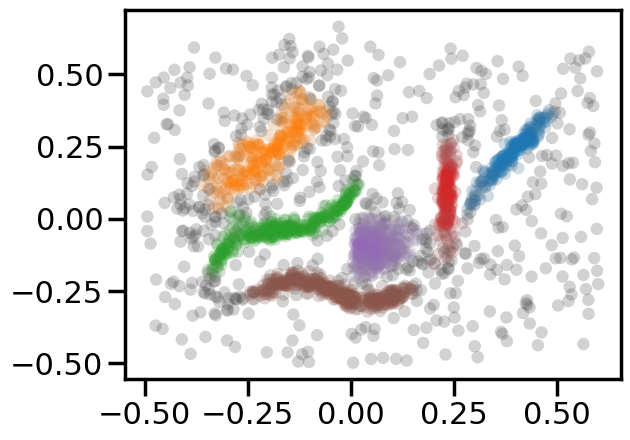

In [24]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=15, gen_min_span_tree=True)
clusterer.fit(data)

palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.3,0.3,0.3) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(data.T[0], data.T[1], c=cluster_colors, **plot_kwds)